<a href="https://colab.research.google.com/github/aarmentamna/machine_learning_advance/blob/main/TC4033_Activity1b_42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Maestría en Inteligencia Artificial Aplicada**
###**Curso: ADVANCE MACHINE LEARNING METHODS**
## Tecnológico de Monterrey
###DR. José Antonio Cantoral Ceballos

## Activity Week 2
###**Implementing a Fully Connected Network for Kaggle ASL Dataset.**

*TEAM MEMBERS:*

*   Roberto Romero Vielma - A00822314
*   José Javier Granados Hernández - A00556717
*   Aquiles Yonatan Armenta Hernandez - A01793252
*   Alan Avelino Fernández Juárez - A00989308

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [58]:
# Clone the repository from the following URL
!git clone https://github.com/rromerov/asl_data.

Cloning into 'asl_data.'...
fatal: could not read Username for 'https://github.com': No such device or address


In [61]:
# Import necessary libraries
import numpy as np          # Import NumPy for numerical operations
import string               # Import the string module for working with strings
import pandas as pd         # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import cv2 as cv            # Import OpenCV for computer vision tasks
import os                   # Import the os module for interacting with the operating system

# Load the autoreload extension to automatically reload modified modules
%load_ext autoreload

# Set autoreload to reload all modules every time a cell is executed
%autoreload 2

# Use %matplotlib inline to display Matplotlib plots inline in the Jupyter Notebook
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# Declare the path to the directory containing the extracted data from a zip file
DATA_PATH = './asl_data/'

# Read the training data from a CSV file located in the DATA_PATH directory
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))

# Read the validation data from a CSV file located in the DATA_PATH directory
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [64]:
# Display the first few rows (header) of the extracted training data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [65]:
# Obtain and sort unique categories (labels)
sorted(train_df['label'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [67]:
# Extract and reshape the 784-vector data into a 28x28 matrix for the training set
x_train_num = train_df.loc[:, train_df.columns != 'label'].values.copy().reshape(-1, 28, 28)

# Check the shape of the reshaped training data
x_train_num.shape

(27455, 28, 28)

In [68]:
# Extract the label values for the training set
y_train_num = train_df['label'].values.copy()

# Check the shape of the extracted label values
y_train_num.shape

(27455,)

In [69]:
# Extract and reshape images from vectors to 28x28 matrices for the validation set
x_test_num = valid_df.loc[:, valid_df.columns != 'label'].values.copy().reshape(-1, 28, 28)

# Check the shape of the reshaped validation data
x_test_num.shape

(7172, 28, 28)

In [70]:
# Extract the label values for the validation set
y_test_num = valid_df['label'].values.copy()

# Check the shape of the extracted label values for the validation set
y_test_num.shape

(7172,)

In [73]:
# Check the shape of the validation DataFrame (valid_df)
valid_df.shape

(7172, 785)

### Importar Images

In [74]:
# Cast data type to NumPy arrays
y_train = np.array(train_df['label'])   # Convert the 'label' column of the training DataFrame to a NumPy array
y_val = np.array(valid_df['label'])     # Convert the 'label' column of the validation DataFrame to a NumPy array

# Delete the original 'label' data in the DataFrames to keep only the feature data
del train_df['label']    # Delete the 'label' column from the training DataFrame
del valid_df['label']    # Delete the 'label' column from the validation DataFrame

# Change data type for matrices to float32
x_train = train_df.values.astype(np.float32)  # Convert the training DataFrame to a NumPy array with float32 data type
x_val = valid_df.values.astype(np.float32)    # Convert the validation DataFrame to a NumPy array with float32 data type

In [75]:
# Check the shape of the training feature data (x_train)
x_train.shape

(27455, 784)

In [76]:
# Check the shape of the training feature data (y_train)
y_train.shape

(27455,)

In [77]:
# Transpose the label vector
y_train = y_train.reshape(-1, 1)

# Check the shape of the transposed label vector
y_train.shape


(27455, 1)

In [80]:
# Transpose the validation label vector
y_val = y_val.reshape(-1, 1)

# Check the shape of the transposed validation label vector
y_val.shape

(7172, 1)

In [81]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    A function to split a previously loaded validation set into validation and test sets.
    '''
    # Check if the lengths of input data and labels are the same
    if len(x) != len(y):
        raise ValueError("Input data and labels must have the same length.")

   # Calculate the number of test samples based on the input percentage
    num_test_samples = int(len(x) * pct)

    # Create an array of indices based on the length of the input data
    indices = np.arange(len(x))

    # Shuffle the indices if the shuffle flag is set to True
    if shuffle:
        np.random.shuffle(indices)

     # Slice the shuffled indices to separate validation and test samples
    val_indices = indices[num_test_samples:]
    test_indices = indices[:num_test_samples]

   # Assign the appropriate indices to create validation and test sets
    x_val, y_val = x[val_indices], y[val_indices]
    x_test, y_test = x[test_indices], y[test_indices]

    return x_val, y_val, x_test, y_test

In [82]:
# Generate validation and test data sets by calling the split_val_test function
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [83]:
# Check the shape of the validation feature data (x_val)
x_val.shape

(3586, 784)

In [19]:
# Check the shape of the validation feature data (y_val)
y_val.shape

(3586, 1)

In [84]:
# Modify the set of alphabet characters to exclude 'j' and 'z'
alphabet = list(string.ascii_lowercase)   # Create a list containing all lowercase letters
alphabet.remove('j')                      # Remove the letter 'j' from the list
alphabet.remove('z')                      # Remove the letter 'z' from the list

print(len(alphabet))

24


### Normalise

In [85]:
# Normalization function
def normalize(x_mean, x_std, x_data):
    '''
    This function performs normalization on input data.

    Parameters:
    - x_mean: Mean value for normalization.
    - x_std: Standard deviation value for normalization.
    - x_data: Input data to be normalized.

    Returns:
    - Normalized data.
    '''
    return (x_data - x_mean) / x_std

In [86]:
# Normalization of all data sets using previously calculated mean and standard deviation
x_mean = x_train.mean()          # Calculate the mean of the training data
x_std = x_train.std()            # Calculate the standard deviation of the training data

x_train = normalize(x_mean, x_std, x_train)  # Normalize the training data
x_val = normalize(x_mean, x_std, x_val)      # Normalize the validation data
x_test = normalize(x_mean, x_std, x_test)    # Normalize the test data


In [87]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

### Graficar muestras

In [88]:
# Plotting function
def plot_number(image):
    '''
    This function plots a grayscale image.

    Parameters:
    - image: The grayscale image to be plotted.

    Returns:
    - None
    '''
    plt.figure(figsize=(5,5))                # Create a figure for plotting
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))  # Display the image with a grayscale colormap
    plt.axis('off')                          # Turn off the axis labels
    plt.show()                               # Display the plot


The sampled image represents: m


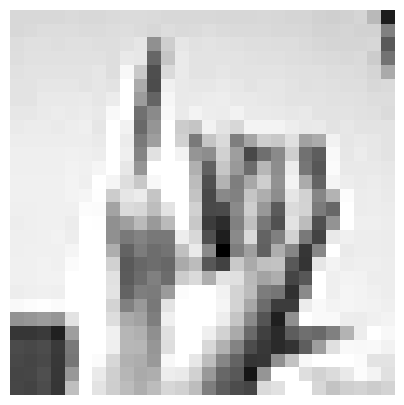

In [89]:
# Sample plot
rnd_idx = np.random.randint(len(y_test))  # Generate a random index within the range of the test data
print(f'The sampled image represents: {alphabet[int(y_test[rnd_idx])]}')
plot_number(x_test_num[rnd_idx])

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [90]:
# Minibatch generator or Data sampler
def create_minibatches(mb_size, x, y, shuffle=True):
    '''
    This function generates minibatches or samples from input data.

    Parameters:
    - mb_size: Mini-batch size, determining the number of samples in each minibatch.
    - x: Input feature data.
    - y: Corresponding labels.
    - shuffle: Boolean flag to shuffle the data before sampling.

    Returns:
    - Generator for minibatches, each containing a mini-batch of feature data and labels.
    '''
    # Ensure that the input data has consistent shape
    assert x.shape[0] == y.shape[0], 'Error: Inconsistent number of samples'
    total_data = x.shape[0]

    # Shuffle the data if the shuffle flag is set to True
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

    # Create and return a generator that yields minibatches of data
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))


## Nuestra clase Linear, ReLU y Sequential

In [91]:
# Custom class np_tensor to inherit from np.ndarray
class np_tensor(np.ndarray): pass

###  Clase Linear

In [157]:
# Class for linear transformation with evaluation function for input and weights
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Initialize parameters using Kaiming He initialization.
        '''
        # Initialize the weight matrix 'W' with Kaiming He initialization
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        # Initialize the bias vector 'b' with zeros
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X):
        # Forward pass: Compute the linear transformation
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        # Backward pass: Compute gradients
        # Compute the gradient of the input 'X'
        X.grad = self.W.T @ Z.grad
        # Compute the gradient of the weight matrix 'W'
        self.W.grad = Z.grad @ X.T
        # Compute the gradient of the bias vector 'b'
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

In [158]:
# Activation function: Rectified Linear Function (ReLU)
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Clase Sequential

In [159]:
# Class that evaluates prediction and propagates corrections to weights and biases
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

In [160]:
# Evaluation function to convert ouptuts to probabilities; softMax
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis=0)
    preds = probs.copy()

    # Convierte y en un arreglo 2D con una sola columna
    y = y.reshape(1, -1)

    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size

    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # dl/dx
    x.grad = probs.copy()

    return preds, cost

### Loop de entrenamiento

In [161]:
# Training Loop
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

### Create your model and train it

In [162]:
# Evaluation metric; Accuracy
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(
            np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

In [163]:
# Model declaration with hyperparameters
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 24)])
mb_size = 512
learning_rate = 1e-4
epochs = 40

In [164]:
# Training function for the declared model
train(model, epochs, mb_size, learning_rate)

costo: 1.166027374226476, accuracy: 0.569994422755159
costo: 0.6253581189253773, accuracy: 0.6865588399330731
costo: 0.323219310837513, accuracy: 0.7214166201896264
costo: 0.1986376624322217, accuracy: 0.7403792526491912
costo: 0.15867454311017237, accuracy: 0.7554378137200223
costo: 0.11439550444930889, accuracy: 0.752649191299498
costo: 0.08379969632357011, accuracy: 0.7571109871723368
costo: 0.06524740165357239, accuracy: 0.7596207473508088
costo: 0.053397113738699625, accuracy: 0.7596207473508088
costo: 0.051893044456393804, accuracy: 0.7621305075292806
costo: 0.040200658815515405, accuracy: 0.7635248187395427
costo: 0.035238431658661286, accuracy: 0.7635248187395427
costo: 0.0352799650187023, accuracy: 0.7607361963190185
costo: 0.027064831772720118, accuracy: 0.7677077523703291
costo: 0.025455616458538662, accuracy: 0.7640825432236475
costo: 0.021898804238254875, accuracy: 0.7657557166759621
costo: 0.021391088153406596, accuracy: 0.7671500278862242
costo: 0.016685765675839275, acc

In [165]:
print(accuracy(x_test, y_test, mb_size))

0.769659788064696


### Test your model on Random data from your test set

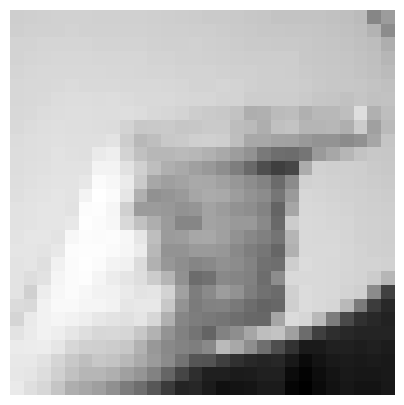

El valor predicho es: g, el valor real es: g


In [169]:
# Pick a random sample, evaluate and show results vs actual classification
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'El valor predicho es: {alphabet[int(pred)]}, el valor real es: {alphabet[int(y_test[idx])]}')